# PROJECT: Analysis of Municipal Employee Satisfaction in the State of Washington: Trend Identification and Improvement Recommendations
## Description: 
This is an analysis of survey responses from **1,500 municipal employees in Washington State** conducted by **Pierce County WA**. This dataset consists of 14725 records (responses) and 9 columns. It was downloaded from the website: **Maven Analytics Data Playground** whose link is: (https://mavenanalytics.io/data-playground?page=3&pageSize=5). This project aims to answer the following main questions:

1- Which survey questions did respondents agree with or disagree with most?

2- Do you see any patterns or trends by department or role?

3- As an employer, what steps might you take to improve employee satisfaction based on the survey results?

In [1]:
#Librairies importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## DATA LOADING AND EXPLORATION -Part I

In [26]:
#Data reading
data = pd.read_excel("data/HR_Employee_Survey_Responses.xlsx", index_col=0)

In [28]:
#This is for having a quick view of the columns and some data rows
data.head()

,Status,Department,Director,Manager,Supervisor,Staff,Question,Response,Response Text
Response ID,,,,,,,,,
1,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
2,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
3,Complete,Parks and Recreation,0,1,0,0,1. I know what is expected of me at work,0.0,Not Applicable
4,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,3.0,Agree
5,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,0.0,Not Applicable


In [3]:
# This is for showing the number of rows and columns in the data. We can notice that our dataset contains 14725 recordings and 9 columns(variables)
data.shape

(14725, 9)

In [4]:
#This is for showing a quick descriptkio of data in term of dtype, non-null count
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14725 entries, 1 to 14710
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         14725 non-null  object 
 1   Department     14725 non-null  object 
 2   Director       14725 non-null  int64  
 3   Manager        14725 non-null  int64  
 4   Supervisor     14725 non-null  int64  
 5   Staff          14725 non-null  int64  
 6   Question       14725 non-null  object 
 7   Response       14590 non-null  float64
 8   Response Text  14590 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.1+ MB


In [5]:
#This shows a quick statistics of numerical columns of the dataset. There are five numerical columns in this dataset:Director, Manager, Supervis
data.describe()

,Director,Manager,Supervisor,Staff,Response
count,14725.000000,14725.000000,14725.000000,14725.000000,14590.000000
mean,0.011545,0.072733,0.112869,0.084890,2.984236
std,0.106829,0.259707,0.316444,0.278727,1.020201
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000


In [6]:
#This allows to check for missing values by columns. There are 135 missing values for columns "Response" and "Response Text". This allows to check for missing values.
missingValue = pd.isna(data).sum()
pourcentageOfMissingValue = (missingValue *100)/data.shape[0]
print("The missing values:")
print(missingValue)
print("The pourcentage of Missing values out of the total values : {}%".format(round(pourcentageOfMissingValue[-2], 2)))

The missing values:
Status             0
Department         0
Director           0
Manager            0
Supervisor         0
Staff              0
Question           0
Response         135
Response Text    135
dtype: int64
The pourcentage of Missing values out of the total values : 0.92%


In [7]:
#To check unique values for Status column
data["Status"].unique()

array(['Complete', 'Incomplete'], dtype=object)

In [8]:
#To check unique values for Department column
data["Department"].unique()

array(['Human Resources', 'Communications Office', 'Parks and Recreation',
       "Prosecuting Attorney's Office",
       'Finance and Performance Management', 'Planning and Public Works',
       'Human Services', "Sheriff's Department",
       "Assessor-Treasurer's Office", 'District Court', 'Superior Court',
       'Medical Examiner', 'Assigned Council', 'Facilities Management',
       'Emergency Management', "Council's Office",
       'Clerk of Superior Court', 'Juvenile Court',
       'Exec Office & Directors', 'Family Justice Center',
       'Economic Development'], dtype=object)

In [9]:
#To check unique values for Response column
data["Response"].unique()

array([ 4.,  0.,  3.,  2.,  1., nan])

## DATA PROCESSING

In [10]:
#Removing of NaN values
data.dropna(inplace=True)
pd.isna(data).sum()

Status           0
Department       0
Director         0
Manager          0
Supervisor       0
Staff            0
Question         0
Response         0
Response Text    0
dtype: int64

In [11]:
data.shape

(14590, 9)

In [12]:
#This piece of code allows to create a new column (Position) whose value depends on the values of the Director, Manager, Supervisor, Staff columns. There are records for which all four columns have the value zero. The Position column value for these records is "Associate"
data['Position'] = 'Associate'
data.loc[(data['Director'] == 1) & (data['Manager'] == 0) & (data['Supervisor'] == 0) & (data['Staff'] == 0), 'Position'] = 'Director'
data.loc[(data['Director'] == 0) & (data['Manager'] == 1) & (data['Supervisor'] == 0) & (data['Staff'] == 0), 'Position'] = 'Manager'
data.loc[(data['Director'] == 0) & (data['Manager'] == 0) & (data['Supervisor'] == 1) & (data['Staff'] == 0), 'Position'] = 'Supervisor'
data.loc[(data['Director'] == 0) & (data['Manager'] == 0) & (data['Supervisor'] == 0) & (data['Staff'] == 1), 'Position'] = 'Staff'

#Since a new column has been created to contain the positions of the different employees, we no longer need the columns: Manager, Supervisor, Director, Associate and Staff. So I reconstitute the dataset by selecting the necessary columns.
data=data[["Status", "Department", "Position", "Question", "Response", "Response Text"]]
data

,Status,Department,Position,Question,Response,Response Text
Response ID,,,,,,
1,Complete,Human Resources,Manager,1. I know what is expected of me at work,4.0,Strongly Agree
2,Complete,Communications Office,Associate,1. I know what is expected of me at work,4.0,Strongly Agree
3,Complete,Parks and Recreation,Manager,1. I know what is expected of me at work,0.0,Not Applicable
4,Complete,Human Resources,Manager,1. I know what is expected of me at work,3.0,Agree
5,Complete,Communications Office,Associate,1. I know what is expected of me at work,0.0,Not Applicable
...,...,...,...,...,...,...
14706,Complete,Planning and Public Works,Supervisor,10. Overall I am satisfied with my job,4.0,Strongly Agree
14707,Complete,Sheriff's Department,Associate,10. Overall I am satisfied with my job,3.0,Agree
14708,Complete,District Court,Associate,10. Overall I am satisfied with my job,4.0,Strongly Agree


In [13]:
#Check the occurrence of responses to the different questions
data["Question"].value_counts()

8. My supervisor holds employees accountable for performance                            1466
2. At work, I have the opportunity to do what I do best every day                       1461
9. My department is inclusive and demonstrates support of a diverse workforce           1460
5. The mission or purpose of our organization makes me feel my job is important         1459
6. I have a best friend at work                                                         1458
4. My supervisor, or someone at work, seems to care about me as a person                1457
3. In the last seven days, I have received recognition or praise for doing good work    1456
1. I know what is expected of me at work                                                1454
10. Overall I am satisfied with my job                                                  1445
7. This last year, I have had opportunities at work to learn and grow                    951
7. This last year, I have had opportunities at work to learn & grow   

In [14]:
#This piece of code allows to remove the start character and the end character to retrieve only the questions
data.loc[data["Question"]== "8. My supervisor holds employees accountable for performance"] = data.loc[data["Question"]== "8. My supervisor holds employees accountable for performance"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "9. My department is inclusive and demonstrates support of a diverse workforce"] = data.loc[data["Question"]== "9. My department is inclusive and demonstrates support of a diverse workforce"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "1. I know what is expected of me at work"] = data.loc[data["Question"]== "1. I know what is expected of me at work"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "2. At work, I have the opportunity to do what I do best every day"] = data.loc[data["Question"]== "2. At work, I have the opportunity to do what I do best every day"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "3. In the last seven days, I have received recognition or praise for doing good work"] = data.loc[data["Question"]== "3. In the last seven days, I have received recognition or praise for doing good work"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "4. My supervisor, or someone at work, seems to care about me as a person"] = data.loc[data["Question"]== "4. My supervisor, or someone at work, seems to care about me as a person"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "5. The mission or purpose of our organization makes me feel my job is important"] = data.loc[data["Question"]== "5. The mission or purpose of our organization makes me feel my job is important"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "6. I have a best friend at work"] = data.loc[data["Question"]== "6. I have a best friend at work"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "10. Overall I am satisfied with my job"] = data.loc[data["Question"]== "10. Overall I am satisfied with my job"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "7. This last year, I have had opportunities at work to learn and grow"] = data.loc[data["Question"]== "7. This last year, I have had opportunities at work to learn and grow"].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "7. This last year, I have had opportunities at work to learn & grow"] = data.loc[data["Question"]== "This last year, I have had opportunities at work to learn and grow"]

data.loc[data["Question"]== "10. Overall I am satisfied with my job "] = data.loc[data["Question"]== "10. Overall I am satisfied with my job "].replace(r'^\d+\.\s*', '', regex=True)

data.loc[data["Question"]== "Overall I am satisfied with my job "]= "Overall I am satisfied with my job"

/home/bignon/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
/home/bignon/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## DATA EXPLORATION - Part II

In [15]:
data["Question"].value_counts()

Overall I am satisfied with my job                                                   1467
My supervisor holds employees accountable for performance                            1466
At work, I have the opportunity to do what I do best every day                       1461
My department is inclusive and demonstrates support of a diverse workforce           1460
The mission or purpose of our organization makes me feel my job is important         1459
I have a best friend at work                                                         1458
My supervisor, or someone at work, seems to care about me as a person                1457
In the last seven days, I have received recognition or praise for doing good work    1456
I know what is expected of me at work                                                1454
This last year, I have had opportunities at work to learn and grow                    951
Name: Question, dtype: int64

### 1 - Which survey questions did respondents agree with or disagree with most?


In [16]:
#The question the respondents agree the most
data.loc[(data["Response Text"]=="Agree"),  "Question"].value_counts()

My department is inclusive and demonstrates support of a diverse workforce           663
My supervisor holds employees accountable for performance                            634
Overall I am satisfied with my job                                                   632
At work, I have the opportunity to do what I do best every day                       618
The mission or purpose of our organization makes me feel my job is important         582
My supervisor, or someone at work, seems to care about me as a person                547
In the last seven days, I have received recognition or praise for doing good work    522
I know what is expected of me at work                                                496
I have a best friend at work                                                         433
This last year, I have had opportunities at work to learn and grow                   398
Name: Question, dtype: int64

Text(0, 0.5, 'Number of responses')

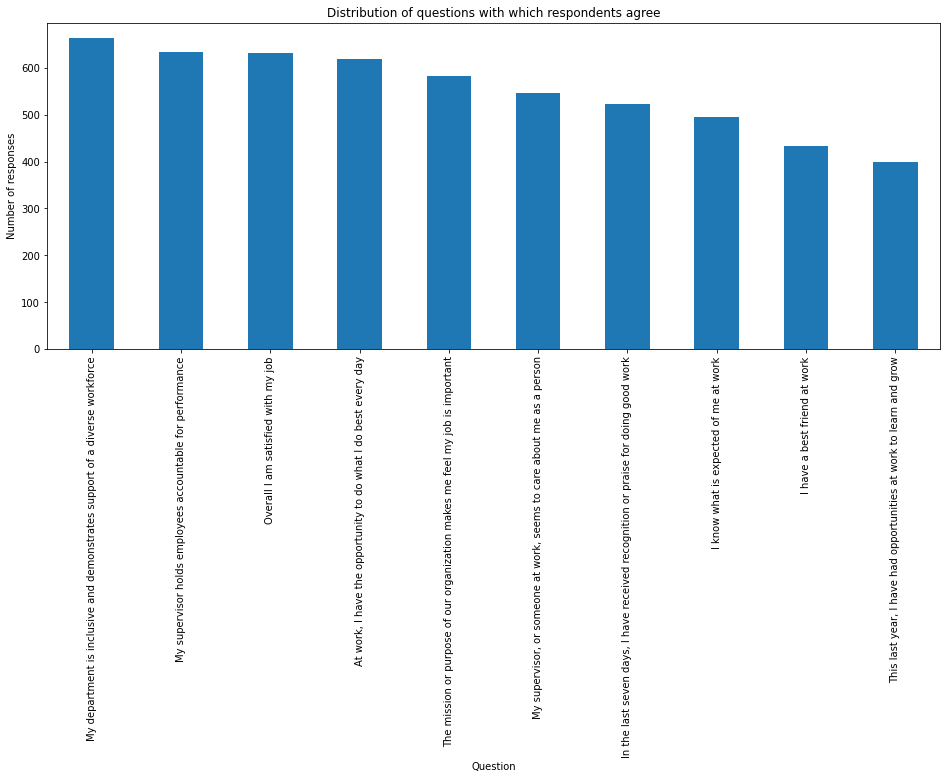

In [17]:
data.loc[(data["Response Text"]=="Agree") ,  "Question"].value_counts().plot(kind="bar", figsize=(16, 6))
plt.title("Distribution of questions with which respondents agree")
plt.xlabel("Question")
plt.ylabel("Number of responses")

In [18]:
#The question the respondents disagree the most
data.loc[(data["Response Text"]=="Disagree"),  "Question"].value_counts()

I have a best friend at work                                                         469
In the last seven days, I have received recognition or praise for doing good work    306
Overall I am satisfied with my job                                                   248
At work, I have the opportunity to do what I do best every day                       214
My supervisor holds employees accountable for performance                            205
The mission or purpose of our organization makes me feel my job is important         175
My department is inclusive and demonstrates support of a diverse workforce           149
This last year, I have had opportunities at work to learn and grow                   131
My supervisor, or someone at work, seems to care about me as a person                115
I know what is expected of me at work                                                 82
Name: Question, dtype: int64

Text(0, 0.5, 'Number of responses')

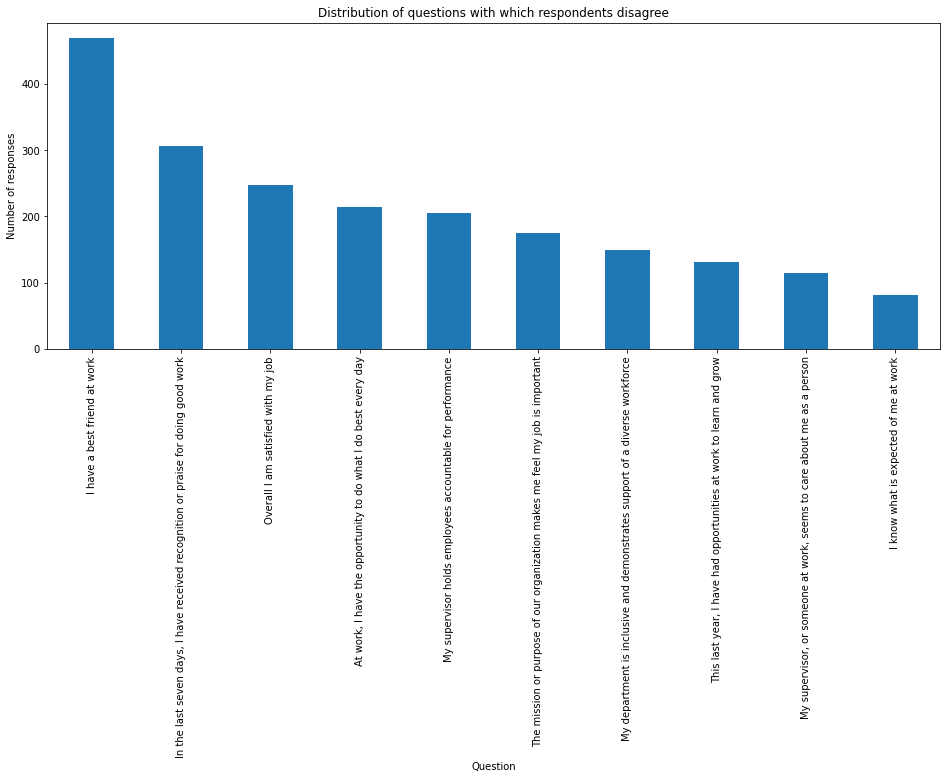

In [19]:
data.loc[(data["Response Text"]=="Disagree") ,  "Question"].value_counts().plot(kind="bar", figsize=(16, 6))
plt.title("Distribution of questions with which respondents disagree")
plt.xlabel("Question")
plt.ylabel("Number of responses")

Text(0, 0.5, 'Nombre de réponses')

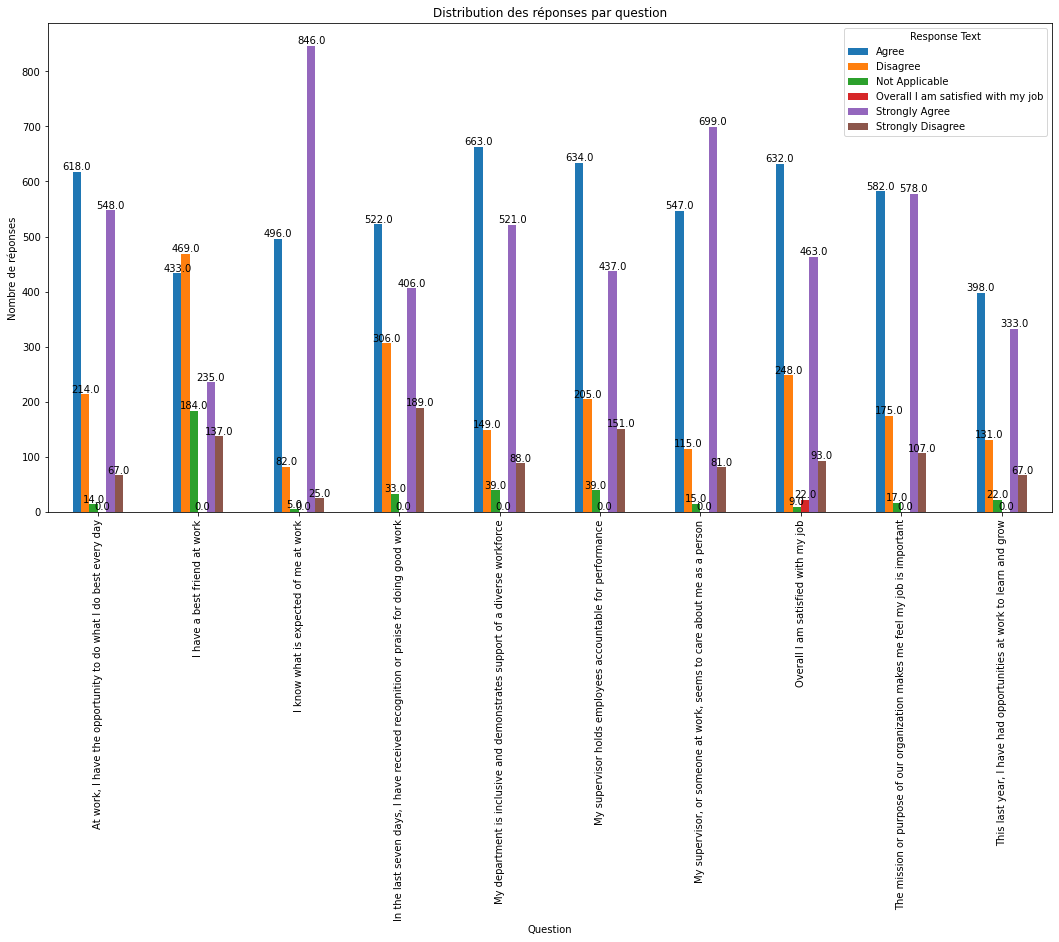

In [20]:
# Group the data by question and response text, then count the occurrences.
grouped_data = data.groupby(["Question", "Response Text"]).size()

# Reorganize the data to have "Agree" and "Disagree" as columns in a DataFrame.
unstacked_data = grouped_data.unstack()

# Plot a bar graph from the DataFrame.
ax = unstacked_data.plot(kind="bar", figsize=(18, 9))

# Add the values on each bar.
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Add a title and axis labels.
plt.title("Distribution des réponses par question")
plt.xlabel("Question")
plt.ylabel("Nombre de réponses")

**RESULT**

Based on the analysis of the graph:

**The top three questions for which employees express the highest level of agreement are**: 

1. I know what is expected of me at work. (846 responses)
2. My supervisor, or someone at work, seems to care about me as a person. (699 responses)
3. The mission or purpose of our organization makes me feel that my job is important. (578 responses)

**Furthermore, the top three questions for which employees express agreement are**: 

1. My department is inclusive and demonstrates support of a diverse workforce. (663 responses)
2. My supervisor holds employees accountable for performance. (634 responses)
3. Overall I am satisfied with my job. (632 responses)

**However, the top three questions for which employees express the highest level of disagreement are**: 

1. In the last seven days, I have received recognition or praise for doing good work. (189 responses)
2. My supervisor holds employees accountable for performance. (151 responses)
3. I have a best friend at work. (137 responses)

**Finally, the top three questions for which employees express disagreement are**:

1. I have a best friend at work. (469 responses)
2. In the last seven days, I have received recognition or praise for doing good work. (306 responses)
3. Overall I am satisfied with my job. (248 responses)

**INTERPRETATION:**

According to the analysis of the graph, several key insights can be drawn regarding employees' sentiments and perceptions within the organization:

1. **Areas of Strong Agreement**:

   The top three questions where employees express the highest level of agreement highlight crucial aspects of their work environment. Firstly, clarity in job expectations is paramount, as employees need to understand what is required of them to perform effectively. Secondly, the presence of caring and supportive relationships at work, particularly from supervisors or colleagues, significantly contributes to employee well-being and job satisfaction. Lastly, the alignment between the organization's mission or purpose and the employees' perception of their job's importance underscores the significance of meaningful work and organizational values.

2. **Positive Aspects of Work Environment**:

   The questions where employees express agreement shed light on positive attributes within the organization. The inclusive nature of the department and the support for diversity suggest a welcoming and equitable workplace culture. Additionally, the accountability held by supervisors for employee performance indicates a structured and goal-oriented approach to work. Overall, the general satisfaction with their job reflects a favorable perception of the overall work experience among employees.

3. **Areas of Concern and Disagreement**:

   Despite the overall positive sentiment, there are areas of concern where employees express disagreement. Notably, the lack of recognition or praise for good work within the past week suggests a potential gap in acknowledgment and appreciation, which can impact morale and motivation. Additionally, the perception of accountability from supervisors may vary among employees, indicating potential discrepancies in leadership effectiveness or communication. The absence of close friendships at work also signals potential challenges in fostering social connections and a sense of belonging within the organization.

4. **Implications for Organizational Improvement**:

   These findings provide valuable insights for organizational improvement. Addressing the need for recognition and praise, fostering stronger relationships among colleagues, and enhancing communication and leadership effectiveness can contribute to a more positive work environment. Furthermore, initiatives aimed at reinforcing clarity in job expectations and aligning individual roles with the organization's mission can enhance employee engagement and satisfaction. Overall, addressing these areas of concern can lead to a more supportive, inclusive, and fulfilling work environment for employees.

## 2- Do you see any patterns or trends by department or role?

/tmp/ipykernel_8150/31780714.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


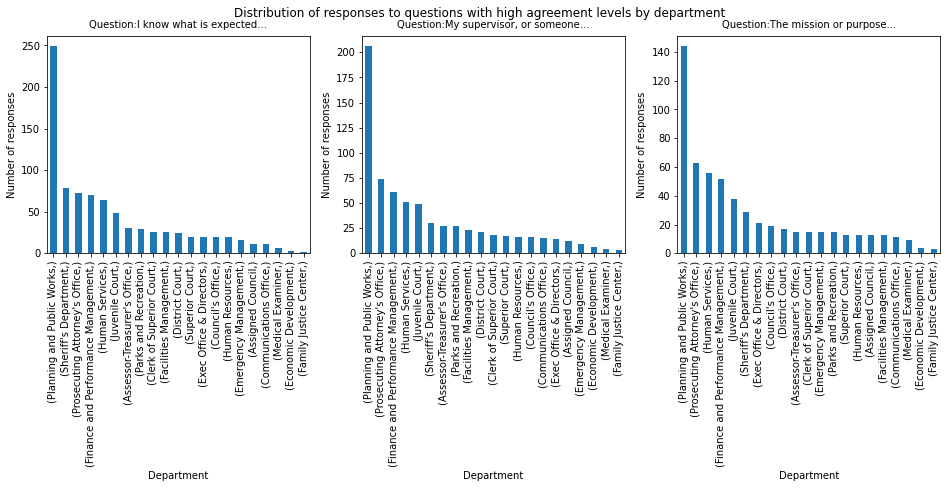

In [21]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
data.loc[(data["Question"]=="I know what is expected of me at work") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:I know what is expected...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 2)
data.loc[(data["Question"]=="My supervisor, or someone at work, seems to care about me as a person") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:My supervisor, or someone...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 3)
data.loc[(data["Question"]=="The mission or purpose of our organization makes me feel my job is important") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:The mission or purpose...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.suptitle("Distribution of responses to questions with high agreement levels by department", ha='center')

plt.tight_layout()
plt.show()

**ANALYSIS AND INTERPRATION**

The analysis of the three graphs provides significant insights into employees' agreement levels across different departments for the three key questions.

Firstly, the 'Planning and Public Works' department stands out as having the highest level of agreement for the three key questions. This suggests that employees in this department have clarity regarding their professional expectations, feel supported by their supervisor or colleagues, and find the organization's mission or purpose meaningful for their work.

In contrast, the 'Family Justice Center' department exhibits the lowest agreement for these questions. This could indicate a lack of clarity regarding professional expectations, perceived low support from supervisors or colleagues, and a lesser sense of importance of the organizational mission.

These results underscore the importance of communication, support, and clarity of goals in a work environment. Departments where employees feel more supported and have a better understanding of their responsibilities appear to have a higher level of satisfaction and engagement at work. This suggests that managers and leaders should pay particular attention to these aspects to improve employee well-being and foster a positive and productive work environment.

/tmp/ipykernel_8150/2575172559.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


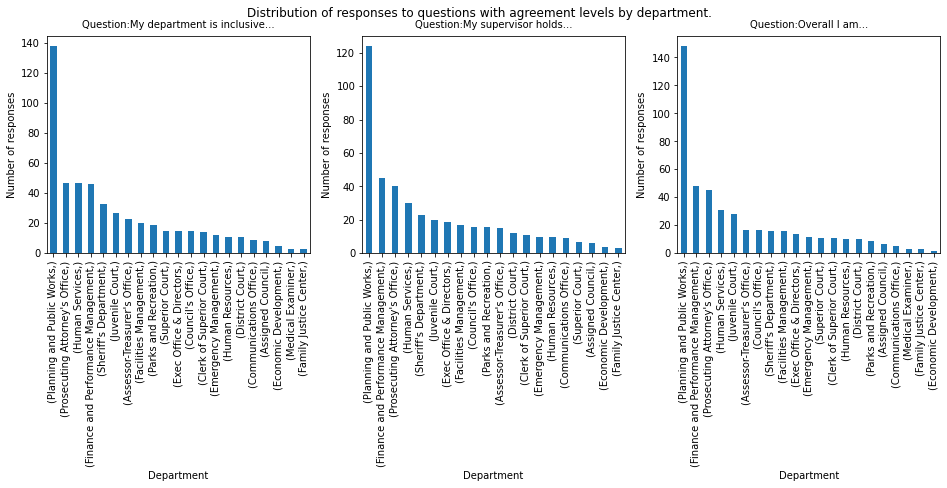

In [22]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
data.loc[(data["Question"]=="My department is inclusive and demonstrates support of a diverse workforce") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:My department is inclusive...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 2)
data.loc[(data["Question"]=="My supervisor holds employees accountable for performance") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:My supervisor holds...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 3)
data.loc[(data["Question"]=="Overall I am satisfied with my job") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:Overall I am...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.suptitle("Distribution of responses to questions with agreement levels by department.", ha='center')

plt.tight_layout()
plt.show()

**ANALYSIS AND INTERPRATION**

The graphs highlight that the 'Planning and Public Works' department consistently displays the highest level of agreement compared to other departments in the company. This suggests that employees in this department are particularly aligned with the questions posed, indicating a well-organized work environment and positive relationships with management.

However, the 'Medical Examiner', 'Economic Development', and 'Family Justice Center' departments exhibit lower levels of agreement. This could signify specific challenges or issues within these departments, such as communication issues, tensions among colleagues, or concerns related to management.

These findings emphasize the importance for managers and department heads to understand the reasons behind these lower levels of agreement and to take steps to improve employee engagement and satisfaction. This may involve additional efforts to foster a positive work environment and encourage open communication and collaboration within teams.

/tmp/ipykernel_8150/659260833.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


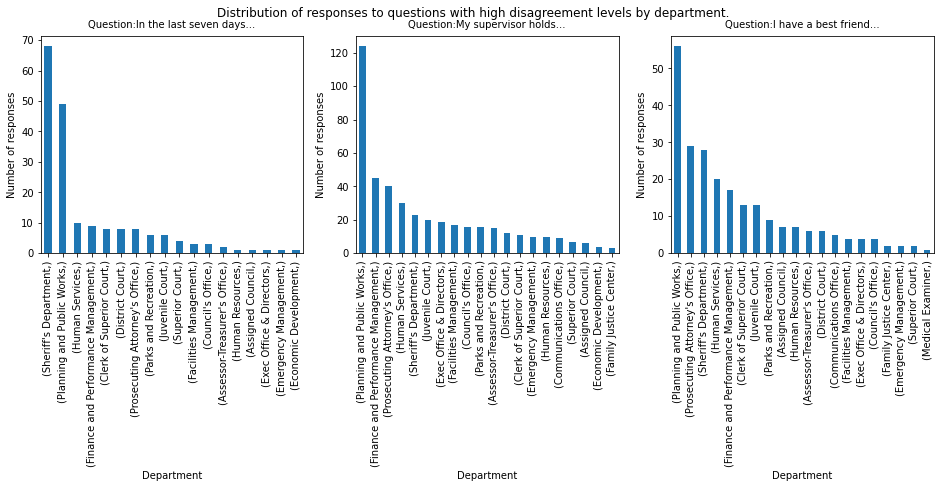

In [23]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
data.loc[(data["Question"]=="In the last seven days, I have received recognition or praise for doing good work") & (data["Response Text"]=="Strongly Disagree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:In the last seven days...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 2)
data.loc[(data["Question"]=="My supervisor holds employees accountable for performance") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:My supervisor holds...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 3)
data.loc[(data["Question"]=="I have a best friend at work") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:I have a best friend...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.suptitle("Distribution of responses to questions with high disagreement levels by department.", ha='center')

plt.tight_layout()
plt.show()

**ANALYSIS AND INTERPRATION**

The analysis reveals interesting patterns in employee perceptions across different departments, particularly regarding specific questions related to workplace dynamics.

Firstly, both the 'Sheriff's Department' and 'Planning and Public Works' departments show a notably high level of disagreement regarding the recognition or praise received for good work in the last seven days. This suggests potential dissatisfaction among employees in these departments regarding acknowledgment or appreciation for their efforts, which could impact morale and motivation.

Secondly, while the 'Planning and Public Works' department also exhibits the highest level of disagreement for the questions regarding supervisor accountability and having a best friend at work, it is noteworthy that these concerns are not as prevalent in the 'Medical Examiner', 'Economic Development', and 'Family Justice Center' departments. This indicates potential managerial or interpersonal challenges specific to the 'Planning and Public Works' department that may need addressing.

Conversely, employees in the 'Medical Examiner', 'Economic Development', and 'Family Justice Center' departments demonstrate a lower level of disagreement for these questions, suggesting a more positive perception of supervisor accountability and workplace relationships in these departments.

Overall, these findings underscore the importance of addressing issues related to recognition, supervisor accountability, and workplace relationships, particularly within the 'Sheriff's Department' and 'Planning and Public Works' departments, to enhance employee satisfaction and organizational effectiveness. Identifying and addressing these concerns can contribute to fostering a positive work environment and improving overall employee engagement and performance.

/tmp/ipykernel_8150/53337029.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


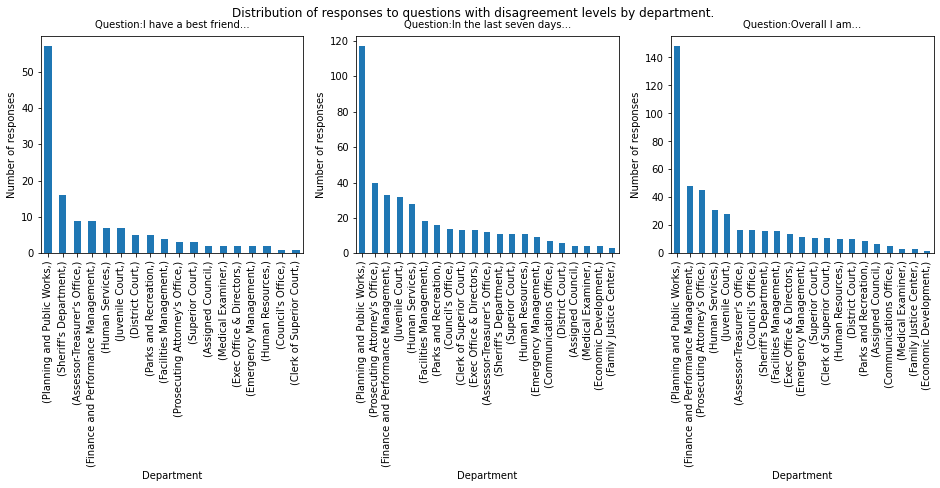

In [24]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
data.loc[(data["Question"]=="I have a best friend at work") & (data["Response Text"]=="Strongly Disagree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:I have a best friend...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 2)
data.loc[(data["Question"]=="In the last seven days, I have received recognition or praise for doing good work") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:In the last seven days...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.subplot(1, 3, 3)
data.loc[(data["Question"]=="Overall I am satisfied with my job") & (data["Response Text"]=="Strongly Agree") ,  "Department"].to_frame().value_counts().plot(kind="bar", figsize=(16, 4))
plt.xlabel("Department")
plt.ylabel("Number of responses")
plt.text(0.5, 1.05, "Question:Overall I am...", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.suptitle("Distribution of responses to questions with disagreement levels by department.", ha='center')

plt.tight_layout()
plt.show()

**ANALYSIS AND INTERPRATION**

The three graphs highlight significant disparities in the level of disagreement among different departments, with a consistent trend where the 'Planning and Public Works' department displays the highest level of disagreement. This suggests that there are specific concerns or issues within this department that could negatively affect the atmosphere and employee satisfaction.

Conversely, the 'Clerk of Superior Court', 'Family Justice Center', and 'Economic Development' departments stand out for their very low level of disagreement, indicating higher cohesion or satisfaction among employees in these departments.

Upon examining the specific questions involved - "I have a best friend at work", "In the last seven days, I have received recognition or praise for doing good work", "Overall I am satisfied with my job" - it is interesting to note that these questions touch on key aspects of job satisfaction and interpersonal relationships. The fact that the 'Planning and Public Works' department shows a higher level of disagreement for these questions raises concerns about the work dynamics and organizational culture within this department.

In conclusion, these results highlight the importance for the managers of the 'Planning and Public Works' department to identify underlying issues and implement corrective measures to improve employee satisfaction and promote a more positive and collaborative work environment. Concurrently, departments with a low level of disagreement can serve as models to identify best practices and foster a more harmonious and satisfying work climate for all employees.

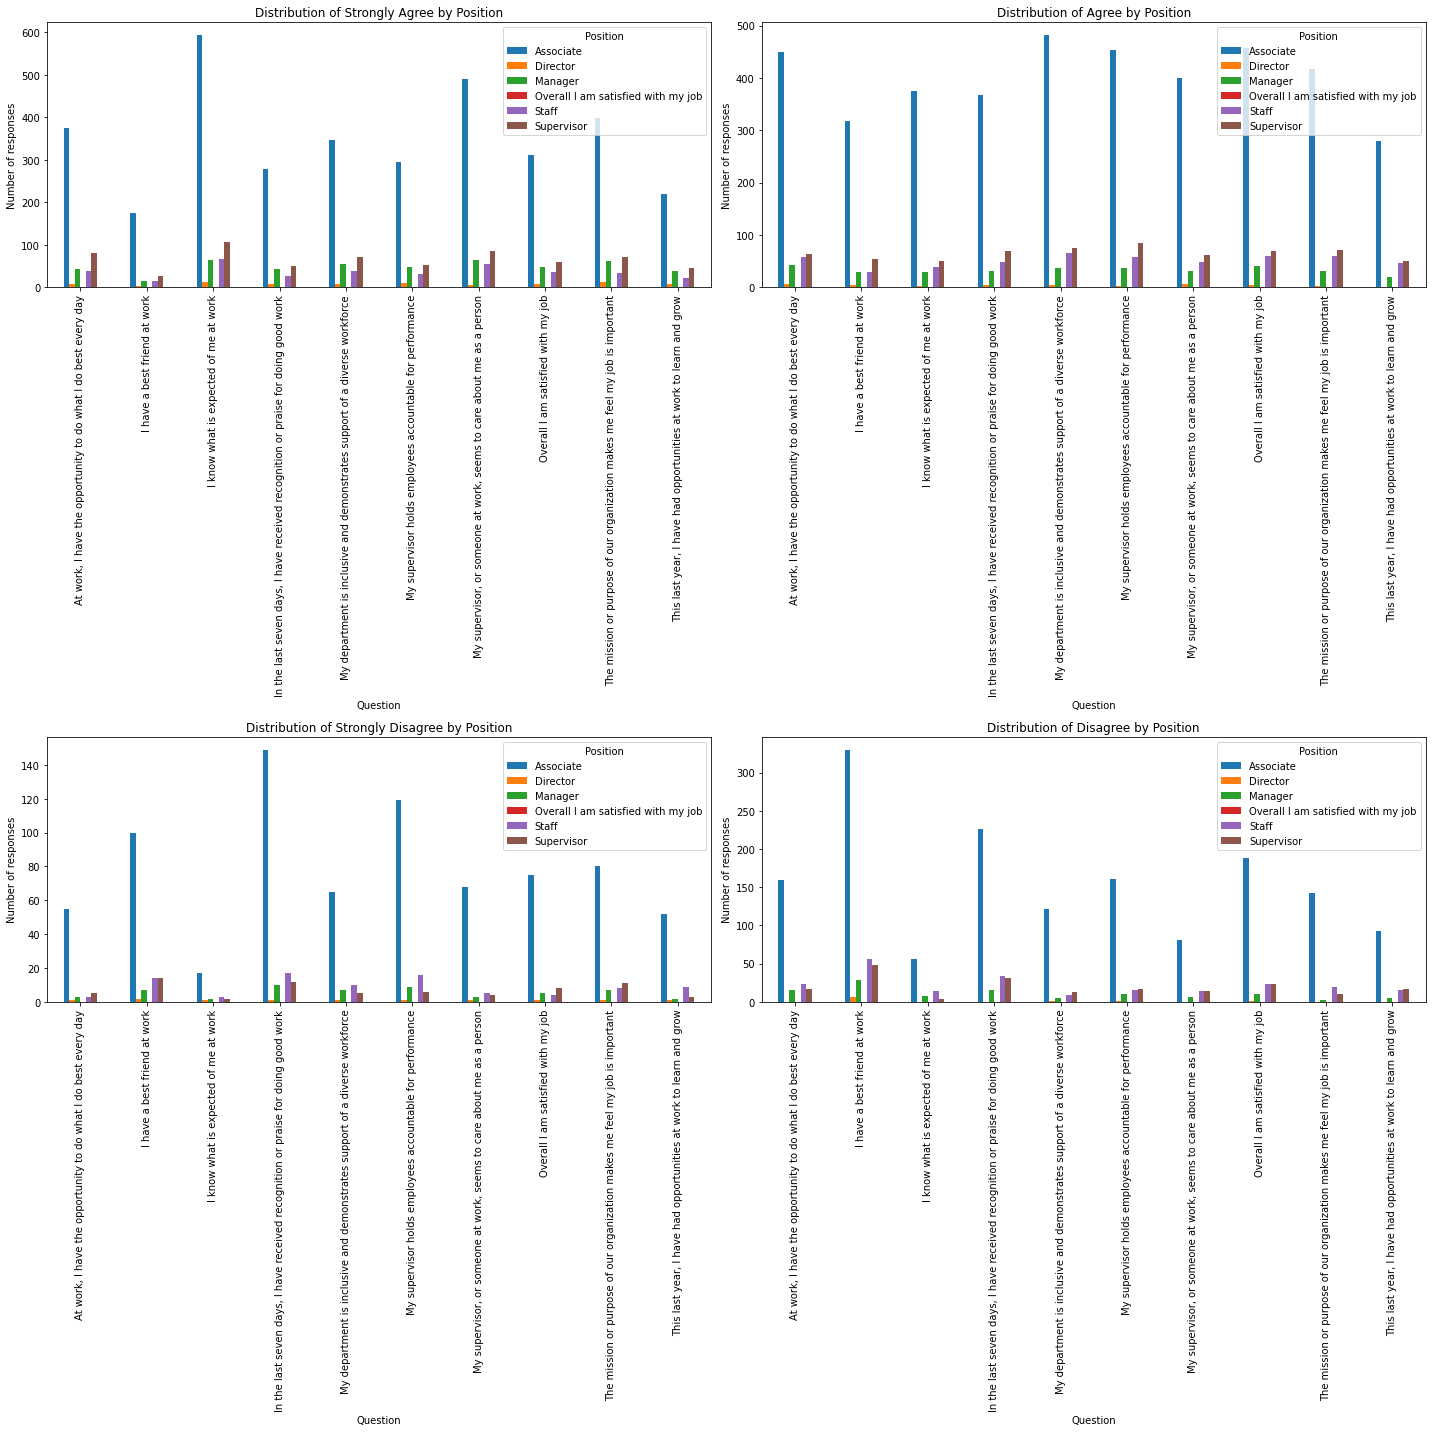

In [25]:
# Group the data by question, response text, and position, then count the occurrences.
grouped_data = data.groupby(["Question", "Response Text", "Position"]).size()

# Reorganize the data to have response text as columns in a DataFrame.
unstacked_data = grouped_data.unstack(level=1)

# Plot a bar graph from the DataFrame.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), gridspec_kw={'height_ratios': [3, 3]})

for i, response_text in enumerate(['Strongly Agree', 'Agree', 'Strongly Disagree', 'Disagree']):
    ax = axes[i//2, i%2]
    data = unstacked_data[response_text].unstack()
    data.plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {response_text} by Position")
    ax.set_xlabel("Question")
    ax.set_ylabel("Number of responses")

plt.tight_layout()
plt.show()


**ANALYSIS AND INTERPRATION**

Your analysis highlights an interesting trend in the distribution of responses based on employees' positions within the company. The graphs show that "Associates" and "Supervisors" tend to be the most in agreement with the questions asked, suggesting that they have a perspective more aligned with the company's expectations or feel more in tune with the organizational culture.

On the other hand, "Associates" and "Staff" appear to be the most in disagreement with the questions. This could indicate specific concerns among these groups of employees, such as communication issues, team challenges, or dissatisfaction with working conditions or management.

By examining these results, it could be useful for company management to better understand the underlying factors contributing to the levels of consensus or disagreement among different groups of employees. This could enable the implementation of targeted measures to improve employee engagement and satisfaction, as well as to enhance communication and collaboration within the organization.

## 3- As an employer, what steps might you take to improve employee satisfaction based on the survey results?

**SUMMARY OF INTERPRETATION**

The analyses reveal interesting trends in employee perceptions, highlighting significant differences between departments and hierarchical levels.

Firstly, the 'Planning and Public Works' department stands out with the highest level of disagreement, suggesting specific concerns within this department that could affect employee morale and satisfaction. In contrast, the 'Clerk of Superior Court', 'Family Justice Center', and 'Economic Development' departments show very low levels of disagreement, indicating higher cohesion or satisfaction among employees.

A deeper analysis reveals that employees in the 'Associates' and 'Supervisors' departments tend to be most in agreement with the questions, while 'Associates' and 'Staff' are those expressing the most disagreement. This raises potential concerns regarding communication, interpersonal relationships, and job satisfaction, highlighting areas where improvements could be made to foster a more positive and productive work environment.

In conclusion, these analyses provide valuable insights to identify areas for improvement and implement targeted measures to enhance employee engagement and promote a healthy and collaborative organizational culture.

**SOLUTION PROPOSAL**

1. **Enhanced Communication:** Implement clear and open communication channels to allow employees to express their concerns, share ideas, and receive regular feedback from management.

2. **Management and Leadership Training:** Provide management and leadership training programs for supervisors and managers to enhance their skills in communication, team management, and conflict resolution.

3. **Recognition and Rewards:** Establish recognition and rewards programs to appreciate outstanding employee performance and enhance their motivation and engagement.

4. **Inclusion Reinforcement:** Promote an inclusive culture by organizing events and initiatives to celebrate diversity and foster a sense of belonging for all employees.

5. **Feedback and Active Listening:** Implement mechanisms to regularly gather employee feedback and take concrete actions to address raised issues, demonstrating management's commitment to employee well-being.

6. **Professional Development:** Offer professional development opportunities such as training, mentoring, and internal growth programs to enable employees to advance in their careers and feel valued within the organization.

By combining these approaches and tailoring solutions to the specific needs of each department, the company can gradually improve its work environment and strengthen employee engagement and satisfaction.